# Bibliotecas

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
tf.__version__

'2.8.2'

# O Dataset

In [ ]:
dataset = pd.read_csv('/content/Celsius-to-Fahrenheit.csv')
dataset.head()

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0


In [ ]:
dataset.shape

(30, 2)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Celsius     30 non-null     int64  
 1   Fahrenheit  30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [ ]:
dataset.describe()

,Celsius,Fahrenheit
count,30.000000,30.000000
mean,2.000000,35.600000
std,22.780815,41.005466
min,-50.000000,-58.000000
25%,-6.750000,19.850000
50%,0.500000,32.900000
75%,7.750000,45.950000
max,60.000000,140.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


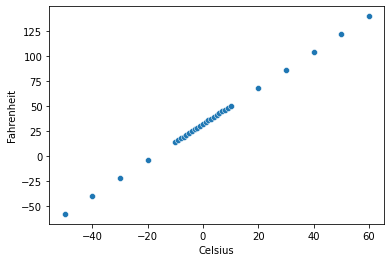

In [ ]:
sns.scatterplot(dataset['Celsius'], dataset['Fahrenheit'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa0c9d1fa90>,
      dtype=object)

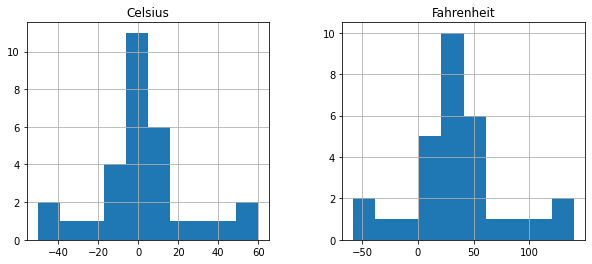

In [ ]:
dataset.hist(figsize=(10, 4))

# Rede Neural - Perceptron

In [ ]:
x = dataset['Celsius']
y = dataset['Fahrenheit']

In [ ]:
# Rede neural com uma sequência de camadas
ann = tf.keras.models.Sequential()
# Criação de camada densa
ann.add(tf.keras.layers.Dense(units=1, input_shape= [1]))

In [ ]:
# Detalhes da Rede Neural
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compilação da Rede Neural
ann.compile(optimizer=tf.keras.optimizers.Adam(0.3), loss='mean_squared_error')

In [ ]:
# Treinamento da Rede Neural
epochs = ann.fit(x, y, epochs=600)

Epoch 1/600
1/1 [==============================] - 1s 993ms/step - loss: 5436.0947
Epoch 2/600
1/1 [==============================] - 0s 24ms/step - loss: 4562.4346
Epoch 3/600
1/1 [==============================] - 0s 18ms/step - loss: 3783.7346
Epoch 4/600
1/1 [==============================] - 0s 11ms/step - loss: 3101.0935
Epoch 5/600
1/1 [==============================] - 0s 14ms/step - loss: 2514.7144
Epoch 6/600
1/1 [==============================] - 0s 33ms/step - loss: 2023.6401
Epoch 7/600
1/1 [==============================] - 0s 15ms/step - loss: 1625.5093
Epoch 8/600
1/1 [==============================] - 0s 11ms/step - loss: 1316.2916
Epoch 9/600
1/1 [==============================] - 0s 33ms/step - loss: 1090.0533
Epoch 10/600
1/1 [==============================] - 0s 16ms/step - loss: 938.8239
Epoch 11/600
1/1 [==============================] - 0s 26ms/step - loss: 852.6166
Epoch 12/600
1/1 [==============================] - 0s 15ms/step - loss: 819.6822
Epoch 13/600
1/

In [ ]:
hist_epochs = epochs.history['loss']

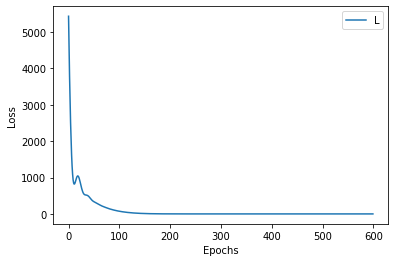

In [ ]:
plt.plot(hist_epochs)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend('Loss')

In [ ]:
# Pegando os valores dos pesos dos neurônios da Rede Neural
ann.get_weights()

[array([[1.8000001]], dtype=float32), array([32.], dtype=float32)]

# Avaliação do Modelo

In [ ]:
predict = ann.predict([0])
correct_result = dataset[dataset['Celsius'] == 0]
correct_result = correct_result['Fahrenheit'].values

# print(predict)
# print(correct_result)
print('Predição da Rede Neural\t\tResultado Esperado')
print(f'{predict[0][0]}\t\t\t\t{correct_result[0]}')

Predição da Rede Neural		Resultado Esperado
32.0				32.0
